# AIN 214 - PA4 - 2023
## Building kNN and Logistic Regression Classifiers


# THE STUDENT INFO
## Student Name: Emirhan Utku
## Student ID: 2210765029

# Dataset: We will use the Breast Cancer Wisconsin (Diagnostic) Dataset available on Kaggle for the assignment. 
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 1. Data Preprocessing

In this section, you will:
- Import necessary libraries
- Load the dataset
- Handle missing values and outliers
- Convert non-numeric values to numeric 
- Perform data normalization

In [1]:
#Import necessary libraries
#Load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import  precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc


path_to_dataset = 'breastcancer.csv'
cancer_df = pd.read_csv(path_to_dataset)

In [2]:
#Handle missing values
empty_columns = cancer_df.columns[cancer_df.isnull().all()]
cancer_df.drop(empty_columns, axis=1, inplace=True)

columns_with_missing_values = cancer_df.columns[cancer_df.isnull().any()]
cancer_df.dropna(subset=columns_with_missing_values, inplace=True)


In [3]:
cancer_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
#Handle outliers
display(cancer_df)


def remove_outliers(column):
    Q1 = cancer_df[column].quantile(0.25)
    Q3 = cancer_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cancer_df.loc[cancer_df[column] > upper_bound, column] = cancer_df[column].mean()
    cancer_df.loc[cancer_df[column] < lower_bound, column] = cancer_df[column].mean()
    
    


numeric_columns = cancer_df.select_dtypes(include=['float64']).columns
for col in numeric_columns:
    remove_outliers(col)
    
print("\nAfter outlier handling:")
display(cancer_df)   


  


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400



After outlier handling:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.000000,0.118400,0.104341,0.088799,0.14710,...,25.380,17.33,184.60,880.583128,0.162200,0.254265,0.711900,0.2654,0.290076,0.118900
1,842517,M,20.57,17.77,132.90,1326.000000,0.084740,0.078640,0.086900,0.07017,...,24.990,23.41,158.80,880.583128,0.123800,0.186600,0.241600,0.1860,0.275000,0.089020
2,84300903,M,19.69,21.25,130.00,1203.000000,0.109600,0.159900,0.197400,0.12790,...,23.570,25.53,152.50,1709.000000,0.144400,0.424500,0.450400,0.2430,0.361300,0.087580
3,84348301,M,11.42,20.38,77.58,386.100000,0.096360,0.104341,0.241400,0.10520,...,14.910,26.50,98.87,567.700000,0.132369,0.254265,0.686900,0.2575,0.290076,0.083946
4,84358402,M,20.29,14.34,135.10,1297.000000,0.100300,0.132800,0.198000,0.10430,...,22.540,16.67,152.20,1575.000000,0.137400,0.205000,0.400000,0.1625,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,654.889104,0.111000,0.115900,0.243900,0.13890,...,25.450,26.40,166.10,880.583128,0.141000,0.211300,0.410700,0.2216,0.206000,0.071150
565,926682,M,20.13,28.25,131.20,1261.000000,0.097800,0.103400,0.144000,0.09791,...,23.690,38.25,155.00,1731.000000,0.116600,0.192200,0.321500,0.1628,0.257200,0.066370
566,926954,M,16.60,28.08,108.30,858.100000,0.084550,0.102300,0.092510,0.05302,...,18.980,34.12,126.70,1124.000000,0.113900,0.309400,0.340300,0.1418,0.221800,0.078200
567,927241,M,20.60,29.33,140.10,1265.000000,0.117800,0.104341,0.088799,0.15200,...,25.740,39.42,184.60,1821.000000,0.165000,0.254265,0.272188,0.2650,0.408700,0.083946


In [5]:
#Convert non-numeric values to numeric
label_encoder = LabelEncoder()
cancer_df['diagnosis'] = label_encoder.fit_transform(cancer_df['diagnosis'])


print("\nAfter converting non-numeric values to numeric values:")
display(cancer_df)


After converting non-numeric values to numeric values:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.000000,0.118400,0.104341,0.088799,0.14710,...,25.380,17.33,184.60,880.583128,0.162200,0.254265,0.711900,0.2654,0.290076,0.118900
1,842517,1,20.57,17.77,132.90,1326.000000,0.084740,0.078640,0.086900,0.07017,...,24.990,23.41,158.80,880.583128,0.123800,0.186600,0.241600,0.1860,0.275000,0.089020
2,84300903,1,19.69,21.25,130.00,1203.000000,0.109600,0.159900,0.197400,0.12790,...,23.570,25.53,152.50,1709.000000,0.144400,0.424500,0.450400,0.2430,0.361300,0.087580
3,84348301,1,11.42,20.38,77.58,386.100000,0.096360,0.104341,0.241400,0.10520,...,14.910,26.50,98.87,567.700000,0.132369,0.254265,0.686900,0.2575,0.290076,0.083946
4,84358402,1,20.29,14.34,135.10,1297.000000,0.100300,0.132800,0.198000,0.10430,...,22.540,16.67,152.20,1575.000000,0.137400,0.205000,0.400000,0.1625,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,654.889104,0.111000,0.115900,0.243900,0.13890,...,25.450,26.40,166.10,880.583128,0.141000,0.211300,0.410700,0.2216,0.206000,0.071150
565,926682,1,20.13,28.25,131.20,1261.000000,0.097800,0.103400,0.144000,0.09791,...,23.690,38.25,155.00,1731.000000,0.116600,0.192200,0.321500,0.1628,0.257200,0.066370
566,926954,1,16.60,28.08,108.30,858.100000,0.084550,0.102300,0.092510,0.05302,...,18.980,34.12,126.70,1124.000000,0.113900,0.309400,0.340300,0.1418,0.221800,0.078200
567,927241,1,20.60,29.33,140.10,1265.000000,0.117800,0.104341,0.088799,0.15200,...,25.740,39.42,184.60,1821.000000,0.165000,0.254265,0.272188,0.2650,0.408700,0.083946


In [6]:
#Perform data normalization

columns_to_normalize = cancer_df.columns.difference(['id', 'diagnosis'])
scaler = MinMaxScaler()
cancer_df[columns_to_normalize] = scaler.fit_transform(cancer_df[columns_to_normalize])

# Normalized veriyi incele
print("\nData Set After Normalization:")
display(cancer_df)


Data Set After Normalization:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,0.745413,0.033070,0.763308,0.725159,0.787294,0.406473,0.316012,0.967763,...,0.899948,0.178009,0.983870,0.397862,0.756189,0.379932,0.921315,0.912027,0.515935,0.948040
1,842517,1,0.920103,0.397828,0.860883,1.000000,0.313143,0.283514,0.309253,0.461645,...,0.879835,0.381830,0.794706,0.397862,0.397478,0.266668,0.312670,0.639175,0.457706,0.504454
2,84300903,1,0.860519,0.569595,0.832866,0.895983,0.663333,0.672280,0.702491,0.841447,...,0.806601,0.452900,0.748515,0.871839,0.589911,0.664887,0.582891,0.835052,0.791039,0.483076
3,84348301,1,0.300562,0.526654,0.326442,0.205159,0.476832,0.406473,0.859075,0.692105,...,0.359979,0.485417,0.355305,0.218847,0.477521,0.379932,0.888961,0.884880,0.515935,0.429124
4,84358402,1,0.901144,0.228529,0.882137,0.975476,0.532328,0.542627,0.704626,0.686184,...,0.753481,0.155883,0.746316,0.795171,0.524521,0.297467,0.517665,0.558419,0.308613,0.322743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,0.987135,0.625864,0.948797,0.432464,0.683054,0.461774,0.867972,0.913816,...,0.903559,0.482065,0.848229,0.397862,0.558150,0.308013,0.531513,0.761512,0.191194,0.239163
565,926682,1,0.890311,0.915104,0.844459,0.945032,0.497112,0.401971,0.512456,0.644145,...,0.812790,0.879316,0.766845,0.884426,0.330220,0.276042,0.416074,0.559450,0.388953,0.168201
566,926954,1,0.651297,0.906713,0.623225,0.604313,0.310466,0.396708,0.329217,0.348816,...,0.569881,0.740865,0.559352,0.537132,0.304998,0.472222,0.440404,0.487285,0.252221,0.343824
567,927241,1,0.922134,0.968411,0.930442,0.948414,0.778842,0.406473,0.316012,1.000000,...,0.918515,0.918538,0.983870,0.935919,0.782345,0.379932,0.352256,0.910653,0.974121,0.429124


## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


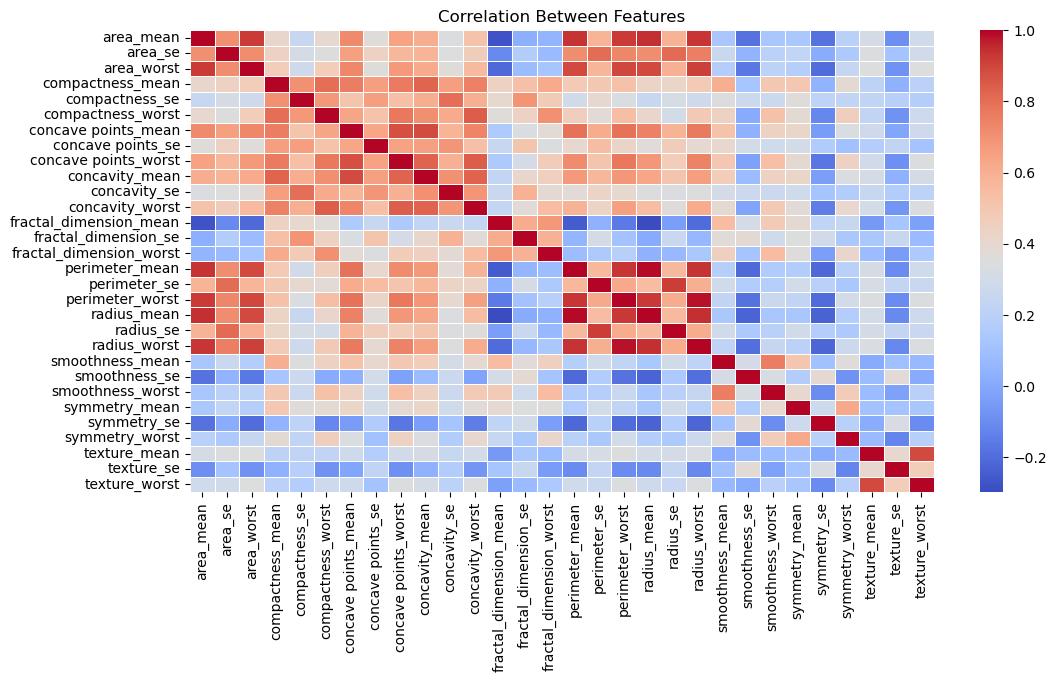

In [7]:
#Correlation heatmap

columns_to_exclude = ['id', 'diagnosis']
columns_to_visualize = cancer_df.columns.difference(columns_to_exclude)

correlation_matrix = cancer_df[columns_to_visualize].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Features')
plt.show()

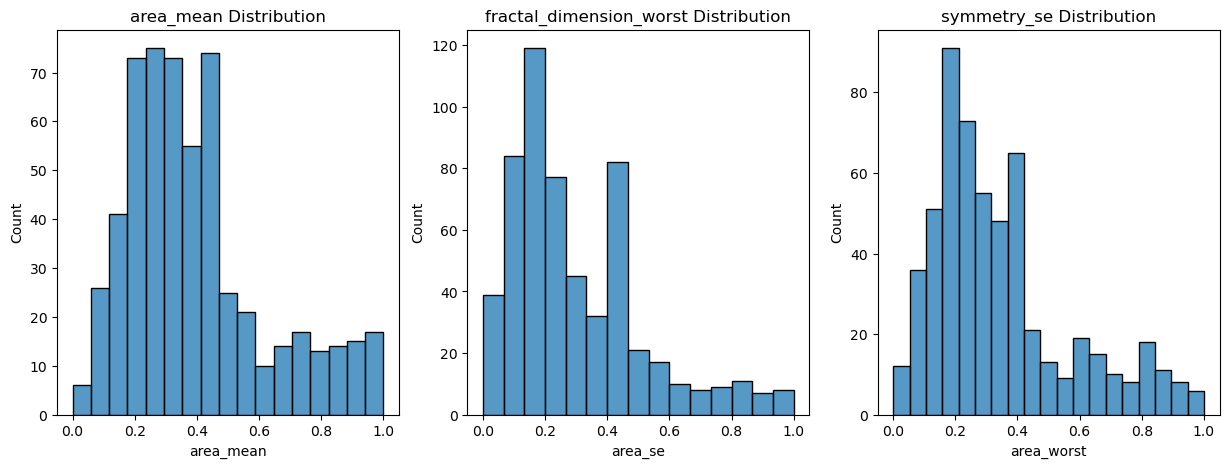

In [8]:
#Distribution plots for at least 3 features

plt.figure(figsize=(15, 5))

# First feature
plt.subplot(1, 3, 1)
sns.histplot(cancer_df[columns_to_visualize[0]])
plt.title(columns_to_visualize[0] + ' Distribution')

# Second feature
plt.subplot(1, 3, 2)
sns.histplot(cancer_df[columns_to_visualize[1]])
plt.title(columns_to_visualize[14] + ' Distribution')

# Third feature
plt.subplot(1, 3, 3)
sns.histplot(cancer_df[columns_to_visualize[2]])
plt.title(columns_to_visualize[25] + ' Distribution')

plt.show()

## 3. Data Splitting

Manually split the data into training and testing sets in a 70:30 ratio:
- Shuffle and split the data
- Avoid using predefined functions like train_test_split for this task


In [9]:
def shuffle_and_split(data, split_ratio=0.7, random_seed=100):
    np.random.seed(random_seed)

    
    shuffled_indices = np.random.permutation(len(data))
    shuffled_data = data.iloc[shuffled_indices]

    train_size = int(len(shuffled_data) * split_ratio)
    train_set = shuffled_data[:train_size]
    test_set = shuffled_data[train_size:]
    return train_set, test_set
train_set,test_set=shuffle_and_split(cancer_df)
display(train_set)
display(test_set)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
400,90439701,1,0.739996,0.558243,0.778765,0.719239,0.852092,0.406473,0.316012,0.788158,...,0.663744,0.528327,0.727253,0.640119,0.990659,0.944762,0.352256,0.674914,0.648899,0.961401
225,88143502,0,0.498273,0.185587,0.470679,0.420888,0.514861,0.272031,0.203701,0.302829,...,0.455905,0.163594,0.439842,0.393638,0.452592,0.209588,0.211207,0.373540,0.578216,0.084323
321,894618,1,0.892342,0.491115,0.843493,0.956025,0.249190,0.317003,0.411032,0.508289,...,0.780299,0.369092,0.731652,0.842087,0.225596,0.211597,0.337259,0.489691,0.575512,0.063688
173,871641,0,0.277541,0.246792,0.255241,0.193827,0.536554,0.182040,0.084093,0.169934,...,0.176380,0.160912,0.158369,0.120895,0.376927,0.092248,0.050964,0.147973,0.130166,0.268557
506,91544001,0,0.354730,0.509872,0.344701,0.261818,0.663333,0.458425,0.290925,0.142500,...,0.269727,0.407308,0.254564,0.188866,0.550677,0.341826,0.457487,0.277938,0.441869,0.495101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,87556202,1,0.533482,0.666338,0.546904,0.446427,0.590083,0.854559,0.603915,0.584079,...,0.420320,0.528327,0.499963,0.343003,0.470341,0.732345,0.593892,0.593471,0.554268,0.474614
281,8912055,0,0.322229,0.212734,0.294174,0.240000,0.220031,0.114917,0.079893,0.181776,...,0.277463,0.209185,0.251411,0.199394,0.208781,0.096600,0.087162,0.284880,0.593279,0.175772
373,901288,1,0.924843,0.377098,0.879239,0.432464,0.450063,0.422065,0.543416,0.588224,...,0.899433,0.373785,0.853362,0.397862,0.700140,0.465694,0.538243,0.725773,0.434144,0.230255
81,8611161,0,0.430564,0.303554,0.412521,0.318393,0.637977,0.641661,0.416014,0.459671,...,0.391955,0.374455,0.339101,0.245852,0.675852,0.756281,0.628705,0.586942,0.757822,0.691211


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
519,917080,0,0.390615,0.345015,0.374070,0.296237,0.704184,0.441680,0.138078,0.197039,...,0.336256,0.325846,0.316885,0.251116,0.618870,0.285583,0.184159,0.276460,0.581692,0.453236
82,8611555,1,0.483871,0.750247,0.465453,0.432464,0.616847,0.406473,0.316012,0.321836,...,0.430077,0.724103,0.416828,0.397862,0.710416,0.971376,0.838100,0.985223,0.305137,0.743171
156,8711202,1,0.724423,0.544423,0.711139,0.693615,0.690097,0.703856,0.660142,0.693421,...,0.646725,0.438820,0.604810,0.638975,0.565624,0.539847,0.463699,0.520619,0.346852,0.331651
453,911201,0,0.511138,0.210760,0.483721,0.423425,0.667559,0.349440,0.245374,0.427303,...,0.405879,0.164599,0.386319,0.323092,0.499299,0.201721,0.177689,0.367354,0.402086,0.342340
468,9113538,1,0.719006,0.672261,0.726596,0.707822,0.427948,0.866042,0.760142,0.659211,...,0.703455,0.564868,0.683261,0.716215,0.368519,0.755277,0.668435,0.685911,0.284280,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,91813701,0,0.438689,0.446199,0.421698,0.344693,0.633751,0.451727,0.149502,0.207368,...,0.382671,0.440496,0.377520,0.305870,0.758057,0.477243,0.343471,0.490378,0.754345,0.469270
53,857392,1,0.760986,0.443731,0.739156,0.752220,0.736583,0.617740,0.630605,0.697368,...,0.653430,0.405967,0.620940,0.649846,0.436712,0.338813,0.339459,0.455326,0.562379,0.368616
350,899187,0,0.316812,0.363277,0.288958,0.234672,0.184533,0.080949,0.029559,0.076447,...,0.275915,0.258800,0.243420,0.204428,0.171228,0.062721,0.039420,0.146460,0.450367,0.196110
79,8610908,0,0.398064,0.409181,0.380640,0.306808,0.518805,0.363984,0.138399,0.152303,...,0.325425,0.429098,0.304055,0.249971,0.445119,0.312700,0.224020,0.272371,0.468907,0.358373


## 4. Model Building

### 4.1. kNN Classifier

- Build and train the kNN model
- Choose the optimal k value using Minkowski distance with at least two different values for p 

## Important

- **I was receiving a FutureWarning indicating that the default behavior of the mode function in the SciPy library would change in future versions. In other words, the current version of the SciPy library had a certain behavior in the mode function, and this behavior was expected to be different in future releases. The FutureWarning was displayed to inform users about this anticipated change.Developers of SciPy use such warnings to communicate that they might deprecate or modify the existing behavior in future versions of the library**

- **This code implements a filtering action to ignore future alerts**

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
X_train = train_set.drop(['id', 'diagnosis'], axis=1)
y_train = train_set['diagnosis']

X_test = test_set.drop(['id', 'diagnosis'], axis=1)
y_test = test_set['diagnosis']


def train_knn_model(X_train, y_train, k, p):
    knn_model = KNeighborsClassifier(n_neighbors=k, p=p)
    knn_model.fit(X_train, y_train)
    return knn_model


best_accuracy = 0
best_k = 0
best_p = 0

for p_value in [1, 2]:  
    for k_value in range(1, 31): 
        knn_model = train_knn_model(X_train, y_train, k=k_value, p=p_value)
        y_pred = knn_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"k={k_value}, p={p_value}, Accuracy: {accuracy}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k_value
            best_p = p_value

print(f"\nBest k value: {best_k}, Best p value: {best_p}, Best accuracy: {best_accuracy}")

k=1, p=1, Accuracy: 0.9532163742690059
k=2, p=1, Accuracy: 0.935672514619883
k=3, p=1, Accuracy: 0.9590643274853801
k=4, p=1, Accuracy: 0.9532163742690059
k=5, p=1, Accuracy: 0.9590643274853801
k=6, p=1, Accuracy: 0.9590643274853801
k=7, p=1, Accuracy: 0.9649122807017544
k=8, p=1, Accuracy: 0.9532163742690059
k=9, p=1, Accuracy: 0.9590643274853801
k=10, p=1, Accuracy: 0.9532163742690059
k=11, p=1, Accuracy: 0.9532163742690059
k=12, p=1, Accuracy: 0.9532163742690059
k=13, p=1, Accuracy: 0.9532163742690059
k=14, p=1, Accuracy: 0.9532163742690059
k=15, p=1, Accuracy: 0.9532163742690059
k=16, p=1, Accuracy: 0.9473684210526315
k=17, p=1, Accuracy: 0.9532163742690059
k=18, p=1, Accuracy: 0.9415204678362573
k=19, p=1, Accuracy: 0.9415204678362573
k=20, p=1, Accuracy: 0.9415204678362573
k=21, p=1, Accuracy: 0.9415204678362573
k=22, p=1, Accuracy: 0.9415204678362573
k=23, p=1, Accuracy: 0.9415204678362573
k=24, p=1, Accuracy: 0.9415204678362573
k=25, p=1, Accuracy: 0.9473684210526315
k=26, p=1,

### 4.2. Logistic Regression

- Build and train the Logistic Regression model

In [12]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)


y_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy}")

Logistic Regression Model Accuracy: 0.9532163742690059


## 5. Model Evaluation

### 5.1. Confusion Matrix

Analysis of the confusion matrices for both models:
- Plot and interpret the confusion matrices
- Display accuracy, precision, recall, and F1-score for both models

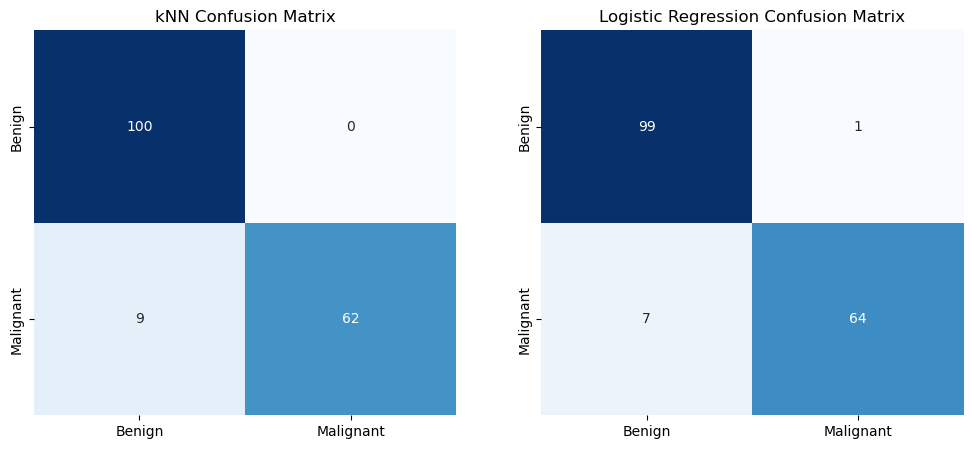


kNN Model Performance:
Accuracy: 0.947
Precision: 1.000
Recall: 0.873
F1 Score: 0.932

Logistic Regression Model Performance:
Accuracy: 0.953
Precision: 0.985
Recall: 0.901
F1 Score: 0.941


In [13]:
y_pred_knn = knn_model.predict(X_test)
y_pred_logistic_regression = logistic_regression_model.predict(X_test)


cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("kNN Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(cm_logistic_regression, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Logistic Regression Confusion Matrix")

plt.show()

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


accuracy_knn, precision_knn, recall_knn, f1_knn = calculate_metrics(y_test, y_pred_knn)
accuracy_logistic_regression, precision_logistic_regression, recall_logistic_regression, f1_logistic_regression = calculate_metrics(y_test, y_pred_logistic_regression)


print("\nkNN Model Performance:")
print(f"Accuracy: {accuracy_knn:.3f}")
print(f"Precision: {precision_knn:.3f}")
print(f"Recall: {recall_knn:.3f}")
print(f"F1 Score: {f1_knn:.3f}")

print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_logistic_regression:.3f}")
print(f"Precision: {precision_logistic_regression:.3f}")
print(f"Recall: {recall_logistic_regression:.3f}")
print(f"F1 Score: {f1_logistic_regression:.3f}")

### 5.2. Precision-Recall Curves

Evaluate the Precision-Recall curves for both models:
- Plot and analyze the curves

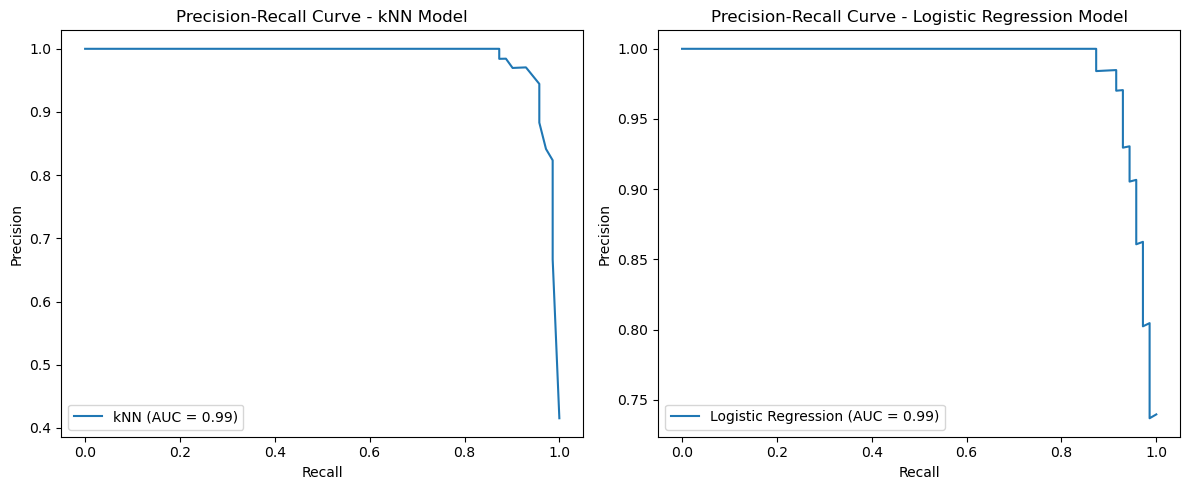

In [14]:
plt.figure(figsize=(12, 5))

# kNN Model
probas_knn = knn_model.predict_proba(X_test)[:, 1]
precision_knn, recall_knn, _ = precision_recall_curve(y_test, probas_knn)
auc_knn = auc(recall_knn, precision_knn)

plt.subplot(1, 2, 1)
plt.plot(recall_knn, precision_knn, label=f'kNN (AUC = {auc_knn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - kNN Model')
plt.legend()

# Logistic Regression Model
probas_logistic_regression = logistic_regression_model.predict_proba(X_test)[:, 1]
precision_logistic_regression, recall_logistic_regression, _ = precision_recall_curve(y_test, probas_logistic_regression)
auc_logistic_regression = auc(recall_logistic_regression, precision_logistic_regression)

plt.subplot(1, 2, 2)
plt.plot(recall_logistic_regression, precision_logistic_regression, label=f'Logistic Regression (AUC = {auc_logistic_regression:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression Model')
plt.legend()

plt.tight_layout()
plt.show()

- **The AUC value represents the area under the curve. High AUC values indicate that the model performs well. Since both models have high AUC values, both models perform well.**



- **High precision and low recall describe a situation where a classification model's positive predictions are often accurate, but at the same time, it misses some of the positive examples. In other words, the model correctly identifies most of the instances it predicts as positive, but it overlooks some instances that are actually positive. This indicates that the model is quite selective and only labels instances as positive when it is highly confident.**




### 5.3. Choose an appropriate metric to evaulate the models. Compare the models and discuss why you chose the metric.

- **To evaluate the Breast Cancer Wisconsin (Diagnostic) Data Set, the preferred metric would be "recall," with a focus on not missing real positive examples. This metric measures how effectively the model detects true positives, aiming to minimize the false negative rate. In health applications like breast cancer diagnosis, it is crucial not to overlook cancerous conditions and accurately identify true positive examples. Therefore, the recall metric is significant for assessing how sensitive the model is in detecting true positives, providing insight into whether learning algorithms can better identify real positives.**

- **When comparing models, considering recall values will offer information on how successful both models are in identifying true positives. However, it's important to note that in order to increase recall, precision may decrease, potentially leading to an increase in false positives. Therefore, to understand the performance of both models and make an appropriate choice, considering the precision-recall trade-off will provide a more comprehensive evaluation.**

- **The logistic regression model has a higher recall compared to the k-NN model, meaning it more effectively detects true positive instances. This implies that logistic regression makes fewer false negative predictions, reducing the likelihood of missing true positive cases.**